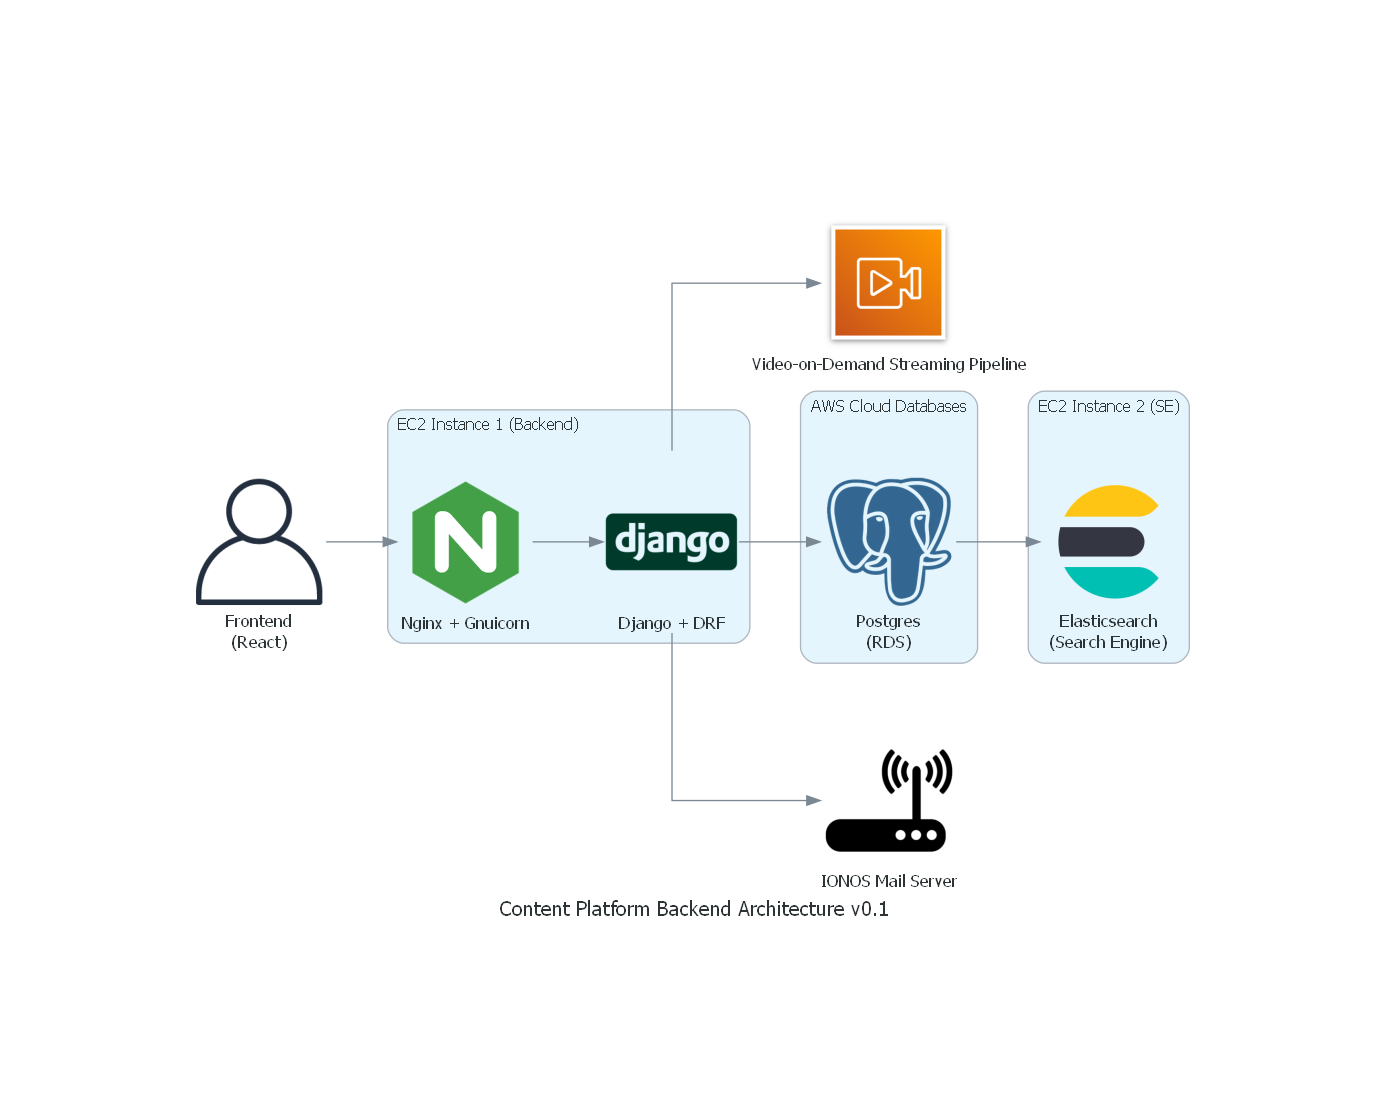

In [34]:
# pip install diagrams

from diagrams import Diagram, Cluster
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.onprem.database import PostgreSQL
from diagrams.aws.network import ELB
from diagrams.aws.integration import SQS
from diagrams.aws.storage import S3
from diagrams.aws.media import MediaServices
from diagrams.onprem.client import User
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.network import Nginx
from diagrams.onprem.queue import Kafka
from diagrams.onprem.compute import Server
from diagrams.generic.network import Router
from diagrams.programming.framework import Django
from diagrams.elastic.elasticsearch import Elasticsearch

with Diagram("Content Platform Backend Architecture v0.1", show=False) as diag:
    user = User("Frontend\n(React)")
    
    with Cluster("EC2 Instance 1 (Backend)"):
        nginx = Nginx("Nginx + Gnuicorn")
        # gunicorn = Server("Gunicorn")
        django = Django("Django + DRF")

    vod = MediaServices("Video-on-Demand Streaming Pipeline")
    with Cluster("AWS Cloud Databases"):
        rds = PostgreSQL("Postgres\n(RDS)")
    
    email_service = Router("IONOS Mail Server")

    with Cluster("EC2 Instance 2 (SE)"):
        es = Elasticsearch("Elasticsearch\n(Search Engine)")

    nginx >> django
    django >> vod
    django >> rds
    user >> nginx
    rds >> es
    django >> email_service

diag
